# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Awwal Aryananta
- **Email:** awwaln4nt4@gmail.com
- **ID Dicoding:** 	MC006D5Y1389

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren Penjualan dan Pendapatan dari perusahaan E-Commerce ini?
- Bagaimana segmentasi pelanggan yang ada di perusahaan E-Commerce ini?
- Apa saja kategori produk yang paling diminati serta kategori produk yang jarang diminati pada E-Commerce ini?

## Import Semua Packages/Library yang Digunakan

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Library yang digunakan adalah numpy, pandas, matplotlib.pyplot, dan seaborn.
- Numpy digunakan untuk operasi komputasi numerik, terutama dalam operasi array dan matriks.
- Pandas digunakan untuk manipulasi dan analisis data berbasis tabel (DataFrame)
- Matplotlib digunakan untuk visualisasi data dalam bentuk grafik atau plot.
- Seaborn sama seperti matplotlib, digunakan untuk visualisasi data yang lebih estetis dan informatif


## Data Wrangling

### Gathering Data

Memuat data customers (pelanggan) ke dalam dataframe

In [103]:
customers_df = pd.read_csv("data/customers_dataset.csv", delimiter=",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Memuat data orders (pesanan) ke dalam dataframe

In [104]:
orders_df = pd.read_csv("data/orders_dataset.csv", delimiter=",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Memuat data payments (pembayaran) ke dalam dataframe

In [105]:
payments_df = pd.read_csv("data/order_payments_dataset.csv", delimiter=",")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Memuat data products ke dalam dataframe

In [106]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Memuat data ordered products (produk yang dipesan) ke dalam dataframe

In [107]:
ordered_products_df = pd.read_csv("data/order_items_dataset.csv")
ordered_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Memuat product translate (Terjemahan Kategori Produk) ke dalam dataframe

In [108]:
product_translate_df = pd.read_csv("data/product_category_name_translation.csv")
product_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dari seluruh dataset yang ada dalam E-commerce ini, saya merasa bahwa untuk menjawab pertanyaan bisnis yang sudah didefinisikan sebelumnya hanya perlu menggunakan 6 dataset saja, yakni customers,order_items, order_payments, orders, products, dan product_category_name_translation (Terjemahan nama kategori yang lebih dipahami).

- Dataset product_category_name_translation perlu dimasukkan karena saya lihat nama dari kategori produk dalam bahasa yang agak asing dan nantinya akan susah menjelaskan jika masih menggunakan nama kategori aslinya.

- Sebenarnya, sebelumnya saya juga ingin memasukkan dataset geolocation untuk menjawab segmentasi pelanggan berdasarkan demografi, namun saya rasa informasi city(kota) dan state sudah ada dalam dataset customers, jadi saya rasa tidak perlu dimasukkan dalam proses analisis data.

### Assessing Data

#### Menilai data customers

In [109]:
#Mengecek tipe data tiap kolom, dan bila ada missing value dari masing-masing kolom di dataframe customers.
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [110]:
#Mengecek jumlah data yang duplikat
print("Jumlah duplikasi: " , customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [111]:
#Memeriksa parameter statistik
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tipe data dari setiap kolom yang ada di dataframe customers sudah sesuai semua, tidak perlu disesuaikan lagi.
- Tidak ada missing value dan tidak ada duplikasi data dari dataframe customers ini.
- Saya rasa tidak perlu dilakukan pembersihan data karena tidak terdapat masalah pada dataframe customers ini.

#### Menilai data orders

In [112]:
#Mengecek tipe data tiap kolom, dan bila ada missing value dari masing-masing kolom di dataframe orders.
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [113]:
#Mengecek Missing Value yang ditemukan pada pemeriksaan sebelumnya
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [114]:
#Mengecek jumlah data yang duplikat
print("Jumlah duplikasi: " , orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [115]:
#Memeriksa Parameter Statistik
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Terdapat kesalahan tipe data pada kolom order_purchase_timestamp,	order_approved_at,	order_delivered_carrier_date,	order_delivered_customer_date,	order_estimated_delivery_date yang seharusnya bertipe data datetime tetapi dinyatakan dalam object. Sehingga saat di describe tidak muncul nilai first (waktu paling awal) dan last (waktu paling akhir) dari kolom tersebut.

- Terdapat missing value dari beberapa kolom, diantaranya order_approved_at,	order_delivered_carrier_date,	order_delivered_customer_date.

- Tidak ada data yang duplikat.

#### Menilai data payments

In [116]:
#Mengecek tipe data dan jika ada missing value di dataframe payments
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [117]:
#Mengecek jumlah data yang duplikat
print("Jumlah duplikasi: " , payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [118]:
#Mengecek Parameter Statistik
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tidak terdapat kesalahan tipe data
- Tidak ada missing value, dan tidak ada duplikasi data
- Namun, terdapat anomaly atau inaccurate value pada kolom payment_installmentsnya, dimana nilai minimumnya tertulis 0, ini saya rasa tidak mungkin terjadi karena pembayaran minimal dilakukan 1 kali minimalnya apalagi cicilan.

#### Menilai data product

In [119]:
#Mengecek tipe data dan jika ada missing value di dataframe products
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [120]:
#Mengecek kolom yang terdapat missing value
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [121]:
#Mengecek jumlah data yang duplikat
print("Jumlah duplikasi: " , products_df.duplicated().sum())

Jumlah duplikasi:  0


In [122]:
#Mengecek Parameter Statistik
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Dari parameter statistik di atas, ada kemungkinan outlier dari masing-masing kolom numerik. Oleh karena itu, mari kita cek apakah ada outlier pada masing-masing kolom numerik.

In [123]:
#Mengecek apakah ada outlier di kolom product name length
q25, q75 = np.percentile(products_df.product_name_lenght, 25), np.percentile(products_df.product_name_lenght, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in products_df.product_name_lenght if x < minimum or x > maximum]
print(outliers)


[]


In [124]:
#Mengecek apakah ada outlier di kolom product description length
q25, q75 = np.percentile(products_df.product_description_lenght, 25), np.percentile(products_df.product_description_lenght, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in products_df.product_description_lenght if x < minimum or x > maximum]
print(outliers)


[]


In [125]:
#Mengecek apakah ada outlier di kolom product photos quantity
q25, q75 = np.percentile(products_df.product_photos_qty, 25), np.percentile(products_df.product_photos_qty, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in products_df.product_photos_qty if x < minimum or x > maximum]
print(outliers)

[]


In [126]:
#Mengecek apakah ada outlier di kolom product weight (g)
q25, q75 = np.percentile(products_df.product_weight_g, 25), np.percentile(products_df.product_weight_g, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in products_df.product_weight_g if x < minimum or x > maximum]
print(outliers)

[]


In [127]:
#Mengecek apakah ada outlier di kolom product length (cm)
q25, q75 = np.percentile(products_df.product_length_cm, 25), np.percentile(products_df.product_length_cm, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in products_df.product_length_cm if x < minimum or x > maximum]
print(outliers)

[]


In [128]:
#Mengecek apakah ada outlier di kolom product heigth (cm)
q25, q75 = np.percentile(products_df.product_height_cm, 25), np.percentile(products_df.product_height_cm, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in products_df.product_height_cm if x < minimum or x > maximum]
print(outliers)

[]


In [129]:
#Mengecek apakah ada outlier di kolom product width (cm)
q25, q75 = np.percentile(products_df.product_width_cm, 25), np.percentile(products_df.product_width_cm, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in products_df.product_width_cm if x < minimum or x > maximum]
print(outliers)

[]


**Insight:**
- Terdapat missing value pada hampir seluruh kolom, yaitu product_category_name,
product_name_lenght, product_description_lenght, product_photos_qty,	product_weight_g, product_length_cm, product_height_cm, dan product_width_cm
- Tidak ada kesalahan tipe data menurut saya
- Tidak ada duplikasi data
- Setelah dilakukan cek apakah ada outlier di masing-masing kolom numerik, tidak ditemukan adanya outlier dari semua kolom. Walaupun memang terlihat ada indikasi outlier di beberapa kolom, seperti description_length, dan weight.

#### Menilai data ordered product

In [130]:
#Mengecek tipe data dan jika ada missing value di dataframe ordered product
ordered_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [131]:
#Mengecek jumlah data yang duplikat
print("Jumlah duplikasi: " , ordered_products_df.duplicated().sum())

Jumlah duplikasi:  0


In [132]:
ordered_products_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Terdapat kesalahan tipe data di kolom shipping_limit_date, yang merupakan object seharusnya adalah datetime.
- Tidak ada missing value dan tidak ada duplikasi data.

#### Menilai data product translation

In [133]:
product_translate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [134]:
#Mengecek jumlah data yang duplikat
print("Jumlah duplikasi: " , product_translate_df.duplicated().sum())

Jumlah duplikasi:  0


In [135]:
product_translate_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Data sudah baik, tidak ada missing value, tidak ada duplikasi data, dan tipe data sudah sesuai
- Karena tidak ada data numerik, maka fungsi describe() hanya akan menampilkan count (jumlah data), unique (jumlah data yang unik / tidak ada duplikat), top (data paling sering muncul) tetapi karena saya rasa semua data hanya muncul paling banyak sekali / 1x (freq) maka top tidak mewakili apapun.

### Cleaning Data

#### Membersihkan data pada dataframe orders (pesanan)

In [136]:
#Mengubah tipe data pada beberapa kolom yang seharusnya datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [137]:
#Memastikan tipe data sudah terganti
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [138]:
#Mengecek value data yang kolom order approved at nya kosong atau null
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [139]:
#Mengecek value data yang kolom order delivered carrier date nya kosong atau null
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [140]:
#Mengecek value data yang kolom order delivered customer date nya kosong atau null
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [141]:
#Menghilangkan missing value pada beberapa kolom datetime
orders_df.dropna(axis=0, inplace=True)

In [142]:
#Mengecek apakah masih ada missing value
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**
- Pembersihan data dengan masalah tipe data yang salah dilakukan dengan cara mengubah seluruh kolom yang value sebenarnya adalah datetime diubah menggunakan looping dan fungsi to_datetime pada library pandas pada seluruh kolom yang termasuk.
- Penanganan missing value pada dataframe orders_df dilakukan dengan mendrop atau menghapus seluruh data yang memiliki missing value, agar tidak terjadi anomali pada data nantinya. Contohnya order dengan status order cancelled atau unavailable tentu tidak ada waktu pengirimannya, approvalnya juga tentu tidak tersedia karena order dibatalkan.
- Contoh lain pada kolom "order_delivered_carrier_date" dengan status "invoiced' tentu akan tidak memiliki nilai karena pesanan belum terbayar dan otomatis belum terkirim.
- Contoh lain pada kolom "order_delivered_customer_date" rata2 dengan status "shipped" atau "processed", nah tentu tanggal diterima oleh pelanggan atau customer belum tersedia karena pesanan masih diproses atau dikirim.

#### Membersihkan data pada dataframe payments (pembayaran)



In [143]:
#Menangani inaccurate value atau anomaly pada kolom payment_installments (Berapa kali cicilan atau pembayaran dilakukan)
payments_df[payments_df.payment_installments == payments_df.payment_installments.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [144]:
#Menghitung frekuensi masing2 nilai unik dari kolom payment installments
payments_df.payment_installments.value_counts()

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64

In [145]:
#Mengganti nilai minimal atau anomaly (0) menjadi 1 pada kolom payment installments (Tipe Pembayaran)
payments_df["payment_installments"] = payments_df["payment_installments"].replace(payments_df["payment_installments"].min(), 1)

In [146]:
#Mengecek Parameter Statistik
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853368,154.100380
std,0.706584,2.687034,217.494064
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Penanganan inaccurate value dan anomaly pada kolom payment_installments dimana kolom ini menggambarkan berapa kali pembayaran atau cicilan yang dilakukan oleh customer untuk membayar pesanan. Disini nilai minimalnya adalah 0, ini merupakan sebuah anomali dimana pembayaran atau cicilan transaksi minimal adalah 1x (sekali) pembayaran dan tidak mungkin 0x pembayaran.
- Nilai minimal ini saya ganti dengan nilai yang paling sering muncul dan juga mungkin nilai umum dari transaksi dilakukan yaitu 1x (sekali), dimana ada 2 data dilakukan replace menjadi nilai 1 pada kolom payment_installments.

#### Membersihkan data pada dataframe products

In [147]:
#Mengisi value kolom kategorikal product_category_name
products_df["product_category_name"] = products_df["product_category_name"].fillna("Unknown")

In [148]:
#Mengecek Parameter Statistik Dataframe
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [149]:
#Mengubah missing value kolom numerik dengan median
missing_columns = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

for col in missing_columns:
    products_df[col] = products_df[col].fillna(products_df[col].median())



In [150]:
#Mengecek apakah masih ada missing value
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Pada kolom non-numerik atau kategorikal yaitu product_category_name, saya merasa informasi di dalamnya masih penting dan berkaitan dengan tabel atau dataframe lain seperti ordered_product sehingga tidak dapat didrop. Disini solusi yang saya ambil adalah mengisi missing value tersebut dengan nilai "Unknown" untuk mewakili nama kategori produk yang tidak ada bisa jadi karena kesalahan input atau kesalahan pemrosesan sistem.
- Pada kolom numerik atau sisa kolom yang missing value disini saya mengisikan nilainya dengan nilai median, karena semua datanya pada kolom tersebut tidak berdistribusi normal atau median != mean.

#### Membersihkan data pada dataframe ordered_products

In [151]:
#Mengubah kolom shipping_limit_date menjadi datetime
ordered_products_df["shipping_limit_date"] = pd.to_datetime(ordered_products_df['shipping_limit_date'])

In [152]:
#Memastikan tipe data berubah menjadi datetime
ordered_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Penanganan tipe data yang tidak sesuai yaitu pada kolom shipping_limit_date yang bertipe data object, padahal seharusnya bertipe data datetime. Penanganan dilakukan sama seperti sebelumnya pada pembersihan data di orders yaitu memanfaatkan fungsi to_datetime di library panda pada kolom yang diubah sehingga tipe data berganti menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

#### Eksplorasi data customers

In [153]:
#Melihat rangkuman parameter statistik data customers
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [154]:
#Melihat demografi pelanggan berdasarkan kota
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [155]:
#Melihat demografi pelanggan berdasarkan state
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- Karena data customers hanya berisi object atau string(teks) dan hanya 1 numeriknya yaitu zip, dari deskripsi parameter statistik kita hanya bisa mengambil value yang paling sering keluar(modus) dari data tersebut. Contohnya kota sao paulo merupakan modus dari customer_city.
- Customers dari perusahaan E-Commerce ini paling banyak dari kota Sao Paulo, disusul Rio de Janiero, dan Belo Horizonte. Sedangkan berdasarkan state, paling banyak dari SP, lalu RJ, dan MG.

#### Mengeksplorasi data orders

In [156]:
#Menampilkan baris awal dari data orders
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Mengeksplorasi kolom datetime yang ada di orders_df

In [157]:
#Membuat kolom baru yaitu order_completed_time untuk memuat waktu yang dibutuhkan agar pesanan selesai mulai dari pesanan diapprove

order_completed_time = orders_df["order_delivered_customer_date"] - orders_df["order_approved_at"]
order_completed_time = order_completed_time.apply(lambda x: x.total_seconds())
orders_df["order_completed_time (days)"] = round(order_completed_time/86400)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_completed_time (days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [158]:
#Membuat kolom baru yaitu delivery_time untuk memuat waktu yang dibutuhkan untuk mengantar pesanan mulai dari pesanan diterima kurir

delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time (days)"] = round(delivery_time/86400)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_completed_time (days),delivery_time (days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2.0


In [159]:
#Membuat kolom baru yaitu processing order_time, yang menunjukkan waktu pemrosesan pesanan sebelum dikirim, seperti packaging, dan persiapan lainnya

processing_order_time = orders_df["order_completed_time (days)"] - orders_df["delivery_time (days)"]
orders_df["processing_order_time (days)"] = processing_order_time
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_completed_time (days),delivery_time (days),processing_order_time (days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,9.0,4.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2.0,1.0


In [160]:
#Mengecek parameter statistik order_df setelah ditambahkan kolom baru hasil explore
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_completed_time (days),delivery_time (days),processing_order_time (days)
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000,96461.000000,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.119478,9.292429,2.827049
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-7.000000,-16.000000,-171.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,6.000000,4.000000,1.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000,7.000000,2.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,15.000000,12.000000,4.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.000000,205.000000,126.000000


In [161]:
#Menampilkan jumlah pesanan berdasarkan status order
orders_df.groupby(by="order_status")["order_id"].nunique().sort_values(ascending=False).reset_index()

,order_status,order_id
0,delivered,96455
1,canceled,6


**Insight:**
- Karena ada kolom datetime yaitu order approved at, order delivered carrier date, dan order delivered customer date, bisa dilakukan analisis berapa lama waktu yang dibutuhkan untuk menyelesaikan sebuah pesanan secara keseluruhan, waktu pengantarannya maupun proses diluar pengantaran itu (packaging dll).
- Penyelesaian pesanan secara keseluruhan memiliki rata-rata 12.1 hari untuk menyelesaikan sebuah pesanan. Dengan nilai maksimal 209 hari dan nilai minimal -7 hari (anomaly). Lalu untuk waktu delivery sendiri memiliki rata-rata 9.3 hari dengan nilai minimal anomaly (-16) dan nilai maksimal 205 hari. Sedangkan untuk pemrosesan seperti pengemasan dan pengecekan kualitas memiliki rata-rata 2.8 hari dengan nilai minimal -171 (anomaly) dan nilai maksimal 105 hari.
- Nah dari data tersebut, bisa kita lihat bahwa penyelesaian pesanan sebagian besar waktunya digunakan untuk pengantaran dan hanya sedikit untuk pemrosesan.
- Lalu, status order disini terlihat bahwa ada 2 status, yaitu delivered sejumlah 96455 pesanan, dan canceled 6 pesanan. Hal ini menarik karena sebelumnya ada status processed, shipped, invoiced. Namun, karena sudah dibersihkan maka hanya ada 2 status itu yang tertera karena misal bila status invoiced ada kolom yang kosong sehingga itu akan mengganggu proses analisis data.

#### Mengeksplorasi data customers dan orders

In [162]:
#Mengidentifikasi status pelanggan aktif atau tidak, dengan dimuat di kolom baru yaitu status

customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
12221,c6326604c234a96928cd7f255f358978,8ec31beb5c890497f1872b5986d3cc26,70773,brasilia,DF,Active
10232,6c4d762aaa6ab65c892e6cdd1de5947a,e585519b42291f931a5ec37c75cdb7ee,39690,malacacheta,MG,Active
7128,a002b6265756c2bf5ba1f596ac8847b2,8da8e5f4165a7d5e1d0fb2b6061c415f,20720,rio de janeiro,RJ,Active
34880,ccea9568a9b9092688e949bcb955ddd0,a354ee7ba147e604d8b6c07ab4646a14,37900,passos,MG,Active
92739,7a80d4e0354a7e5622cbcfdb831a5d57,224f7dc1344ecd979b9c354e2be92b15,2018,sao paulo,SP,Active


In [163]:
#Menampilkan informasi pelanggan aktif dan tidak aktif
customers_df.groupby(by="status").customer_id.count()

status
Active        96461
Non Active     2980
Name: customer_id, dtype: int64

Melakukan join dataframe customers dan orders

In [164]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_completed_time (days),delivery_time (days),processing_order_time (days),customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0,1.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,9.0,4.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,2.0,1.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


**Insight:**
- Jumlah pelanggan aktif memiliki jumlah dan persentase yang jauh lebih tinggi daripada pelanggan yang tidak aktif atau belum melakukan order. Ini sudah menunjukkan hal positif,namun tetap perlu dilakukan strategi untuk mempertahankan pelanggan aktif agar terus bertransaksi serta mengaktivasi pelanggan yang belum melakukan order

#### Mengeksplorasi data customer, order, dan payments

Melakukan join pada dataframe orders_customers (hasil penggabungan customer dan order) dengan dataframe payments

In [165]:
customers_transaction_df = pd.merge(
    left = orders_customers_df,
    right = payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_transaction_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_completed_time (days),delivery_time (days),processing_order_time (days),customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0,1.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,1.0,credit_card,3.0,179.12


In [166]:
#Mengidentifikasi jumlah pesanan berdasarkan kota
customers_transaction_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


In [167]:
#Mengidentifikasi jumlah pesanan berdasarkan kota
customers_transaction_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,40489
1,RJ,12351
2,MG,11352
3,RS,5342
4,PR,4923
5,SC,3547
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


In [168]:
#Mengidentifikasi jumlah pendapatan berdasarkan kota
customers_transaction_df.groupby(by="customer_city")["payment_value"].sum().sort_values(ascending=False).reset_index().head(10)

,customer_city,payment_value
0,sao paulo,2108073.49
1,rio de janeiro,1112156.04
2,belo horizonte,406050.87
3,brasilia,345221.87
4,curitiba,238582.26
5,porto alegre,214667.83
6,campinas,209028.97
7,salvador,207790.89
8,guarulhos,157629.92
9,niteroi,135458.19


In [169]:
#Mengidentifikasi jumlah pendapatan berdasarkan state
customers_transaction_df.groupby(by="customer_state")["payment_value"].sum().sort_values(ascending=False).reset_index().head(10)

,customer_state,payment_value
0,SP,5768355.09
1,RJ,2055878.41
2,MG,1819029.99
3,RS,861054.35
4,PR,781919.55
5,SC,595361.91
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


In [170]:
#Mengidentiikasi informasi jumlah pesanan berdasarkan metode pembayaran
customers_transaction_df.groupby(by="payment_type")["order_id"].nunique().sort_values(ascending=False).reset_index()

,payment_type,order_id
0,credit_card,74302
1,boleto,19177
2,voucher,3679
3,debit_card,1484


**Insight:**

- Jumlah pesanan oleh pelanggan paling banyak dilakukan di kota Sao Paulo, Rio de Janiero, dan Belo Horizontale. Hal ini sama seperti jumlah kota dengan pelanggan terbanyak, sehingga dapat disimpulkan bahwa kota-kota dengan jumlah pelanggan terbanyak juga berkontribusi pada jumlah pesanan yang tinggi.
- Hal ini sama dengan state, dimana state dengan jumlah order paling banyak ada di SP, RJ, dan MG (sama dengan state dengan jumlah pelanggan tertinggi).
- Setelah dilakukan identifikasi kota dan state dengan jumlah pendapatan tertinggi menghasilkan output data yang sama dengan jumlah penjualan tertinggi, sehingga dapat disimpulkan bahwa penjualan dan pendapatan saling terkait dan berbanding lurus.


#### Mengeksplorasi data product dan ordered product

Melakukan join pada dataframe products dengan dataframe product translate

In [171]:
product_english_translation_df = pd.merge(
    left = products_df,
    right = product_translate_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_english_translation_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Melakukan join pada dataframe product translation english (hasil penggabungan dataframe produk sebelumnya) dengan dataframe ordered product

In [172]:
orders_products_translation_df = pd.merge(
    left= ordered_products_df,
    right= product_english_translation_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders_products_translation_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [173]:
#Menampilkan data produk dengan harga dari yang tertinggi ke terendah
orders_products_translation_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction


In [174]:
#Menampilkan ringkasan yang menunjukkan jumlah produk unik serta rentang harga (min & max) per kategori produk
orders_products_translation_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "price":  ["min", "max"]
})

product_id  price         
                                 nunique    min      max
product_category_name_english                           
agro_industry_and_commerce            74  12.99  2990.00
air_conditioning                     124  10.90  1599.00
art                                   55   3.50  6499.00
arts_and_craftmanship                 19   9.80   289.49
audio                                 58  14.90   598.99
...                                  ...    ...      ...
stationery                           849   2.29  1693.00
tablets_printing_image                 9  14.90   889.99
telephony                           1134   5.00  2428.00
toys                                1411   4.90  1699.99
watches_gifts                       1329   8.99  3999.90

[71 rows x 3 columns]

**Insight:**

- Product dengan harga tertinggi adalah produk berkategori housewares dengan harga 60 ribuam dolar, disusul kategori small appliances 2 kali berturut dengan harga 46-47 ribuan dolar.

#### Mengeksplorasi keseluruhan data pada dataframe all_df

Menggabungkan atau Melakukan join untuk menggabungkan keseluruhan data dengan menggabungkan hasil join pada dataframe customer transaction (Hasil join customer, order, dan payments) dijoinkan dengan dataframe ordered product translation (Hasil join product, product translate, dan ordered product) menggunakan left join.

In [175]:
all_df = pd.merge(
    left=customers_transaction_df,
    right=orders_products_translation_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_completed_time (days),delivery_time (days),...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [176]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "order_id": "nunique",  # Menghitung jumlah order unik
    "price": "sum" # Total revenue
})

order_id    price
customer_state product_category_name_english                   
AC             auto                                  4   606.97
               baby                                  3   697.84
               bed_bath_table                        3   567.70
               books_general_interest                2   633.80
               christmas_supplies                    1    69.90
...                                                ...      ...
TO             sports_leisure                       23  5533.32
               stationery                            3   276.80
               telephony                            20  1268.12
               toys                                 12  1864.15
               watches_gifts                        26  4920.89

[1351 rows x 2 columns]

In [177]:
all_df.groupby(["payment_type", "product_category_name_english"]).agg({
    "order_id": "nunique",  # Menghitung jumlah order unik
    "price": "sum"  # Total revenue
})

order_id     price
payment_type product_category_name_english                    
boleto       agro_industry_and_commerce           49  20474.92
             air_conditioning                     54  10551.04
             art                                  46  10650.53
             arts_and_craftmanship                 7    565.67
             audio                                78   7680.64
...                                              ...       ...
voucher      stationery                           83   9023.36
             tablets_printing_image                3    311.90
             telephony                           154  15195.19
             toys                                133  16151.72
             watches_gifts                       187  46737.11

[263 rows x 2 columns]

In [178]:
top_products = all_df.groupby(["product_id", "product_category_name_english"])["order_id"] \
    .nunique().sort_values(ascending=False).head(10)

print(top_products)

product_id                        product_category_name_english
99a4788cb24856965c36a24e339b6058  bed_bath_table                   456
aca2eb7d00ea1a7b8ebd4e68314663af  furniture_decor                  425
422879e10f46682990de24d770e7f83d  garden_tools                     352
d1c427060a0f73f6b889a5c7c61f2ac4  computers_accessories            313
389d119b48cf3043d311335e499d9c6b  garden_tools                     309
53b36df67ebb7c41585e8d54d6772e08  watches_gifts                    304
368c6c730842d78016ad823897a372db  garden_tools                     291
53759a2ecddad2bb87a079a1f1519f73  garden_tools                     287
154e7e31ebfa092203795c972e5804a6  health_beauty                    262
2b4609f8948be18874494203496bc318  health_beauty                    254
Name: order_id, dtype: int64


In [179]:
bottom_products = all_df.groupby(["product_id", "product_category_name_english"])["order_id"] \
    .nunique().sort_values(ascending=True).head(10)

print(bottom_products)

product_id                        product_category_name_english
00066f42aeeb9f3007548bb9d3f33c38  perfumery                        1
947a46e4f6dcc04e256398abf33e272e  stationery                       1
947638090b86dc69c90b29261178a338  cool_stuff                       1
9472a43e0457615f2742ac021d769197  fashion_male_clothing            1
946d139bde35d0aaa51d5299b531a262  bed_bath_table                   1
946b65d028c40dd63ca9d45fa3e4b65e  computers_accessories            1
94656ce34a307d26e23011bb25148c9e  flowers                          1
945f3073eeafb360bba960560cc63bcc  auto                             1
945657481c47ca039e25c6b061eb9744  consoles_games                   1
947d8cb9d15cf25fff1d6116e0c09730  furniture_decor                  1
Name: order_id, dtype: int64


In [180]:
top_category = all_df.groupby(["product_id", "product_category_name_english"])["order_id"] \
    .nunique().sort_values(ascending=False).head(10)

print(top_category)

product_id                        product_category_name_english
99a4788cb24856965c36a24e339b6058  bed_bath_table                   456
aca2eb7d00ea1a7b8ebd4e68314663af  furniture_decor                  425
422879e10f46682990de24d770e7f83d  garden_tools                     352
d1c427060a0f73f6b889a5c7c61f2ac4  computers_accessories            313
389d119b48cf3043d311335e499d9c6b  garden_tools                     309
53b36df67ebb7c41585e8d54d6772e08  watches_gifts                    304
368c6c730842d78016ad823897a372db  garden_tools                     291
53759a2ecddad2bb87a079a1f1519f73  garden_tools                     287
154e7e31ebfa092203795c972e5804a6  health_beauty                    262
2b4609f8948be18874494203496bc318  health_beauty                    254
Name: order_id, dtype: int64


In [181]:
bottom_category = all_df.groupby(["product_category_name_english"])["order_id"] \
    .nunique().sort_values(ascending=True).head(10)

print(bottom_category)

product_category_name_english
security_and_services         2
fashion_childrens_clothes     7
cds_dvds_musicals            12
la_cuisine                   13
arts_and_craftmanship        23
home_comfort_2               24
diapers_and_hygiene          25
fashion_sport                26
flowers                      29
fashio_female_clothing       36
Name: order_id, dtype: int64


In [182]:
all_df.to_csv("all_data.csv", index=False)

**Insight:**

- Setelah dilakukan eksplorasi untuk mencari produk dengan penjualan dan pendapatan tertinggi serta terendah, tidak dapat dilakukan analisis dan penjelasan lebih lanjut karena produk tidak memiliki nama, dan id nya juga berupa hex code sehingga kurang jelas. Mau diambil dengan format produk berkategori tertentu juga tidak bisa, karena kategori ini dimiliki oleh beberapa produk, tidak satu saja. Malah ada produk berkategori sama ada di top produk namun juga ada di bottom produk, ini tentu saja tidak relevan dan akan menimbulkan ambigu.
- Maka dari itu, dari hasil eksplorasi ini yang bisa digunakan adalah kategori produk secara akumulatif atau keseluruhan yang dapat dilihat mana kategori terbanyak dan mana kategori paling sedikit.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Penjualan dan Pendapatan Perusahaan E-Commerce ini?

Tren Penjualan per Tahun (Yearly Orders)

C:\Users\HP\AppData\Local\Temp\ipykernel_32452\2741716939.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_orders_df = all_df.resample(rule='Y', on='order_approved_at').agg({


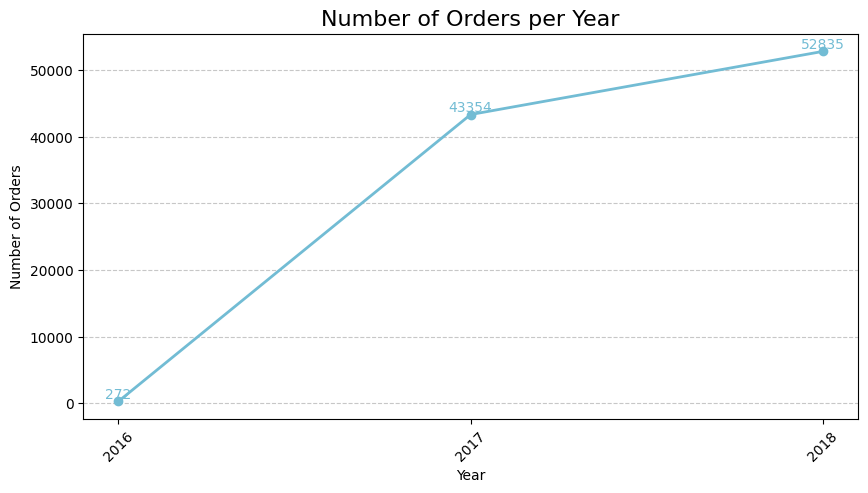

In [183]:
yearly_orders_df = all_df.resample(rule='Y', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})

# Mengubah index ke format tahun (YYYY)
yearly_orders_df.index = yearly_orders_df.index.strftime('%Y')

# Reset index dan rename kolom
yearly_orders_df = yearly_orders_df.reset_index()

yearly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

# Visualisasi Order per Tahun
plt.figure(figsize=(10, 5))
plt.plot(yearly_orders_df["order_approved_at"], yearly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4", label="Order Count")

# Menambahkan label angka di atas titik-titik
for i, txt in enumerate(yearly_orders_df["order_count"]):
    plt.text(yearly_orders_df["order_approved_at"][i], yearly_orders_df["order_count"][i], str(txt),
             ha="center", va="bottom", fontsize=10, color="#72BCD4")

plt.title("Number of Orders per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Tren Pendapatan per Tahun (Yearly Revenue)

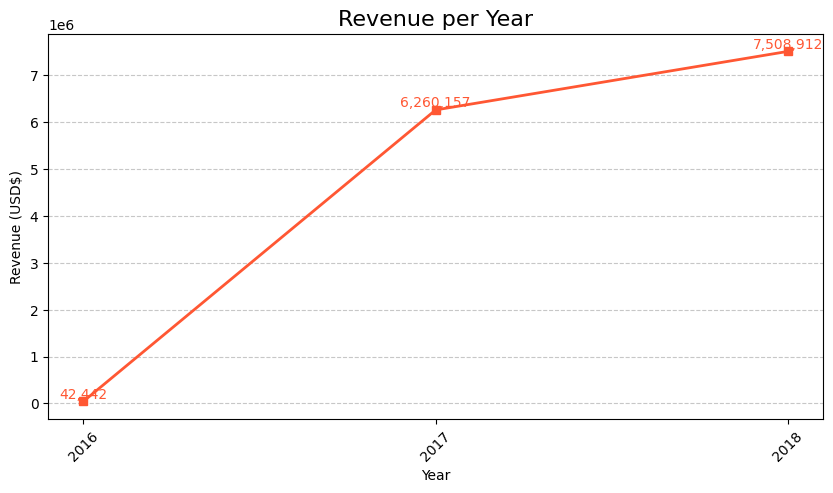

In [184]:
# Visualisasi Revenue per Tahun
plt.figure(figsize=(10, 5))
plt.plot(yearly_orders_df["order_approved_at"], yearly_orders_df["revenue"], marker='s', linewidth=2, color="#FF5733", label="Revenue")

# Menambahkan label angka di atas titik-titik
for i, txt in enumerate(yearly_orders_df["revenue"]):
    plt.text(yearly_orders_df["order_approved_at"][i], yearly_orders_df["revenue"][i], f"{txt:,.0f}",
             ha="center", va="bottom", fontsize=10, color="#FF5733")

plt.title("Revenue per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Revenue (USD$)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Tren Penjualan Bulanan Akumulasi 3 Tahun

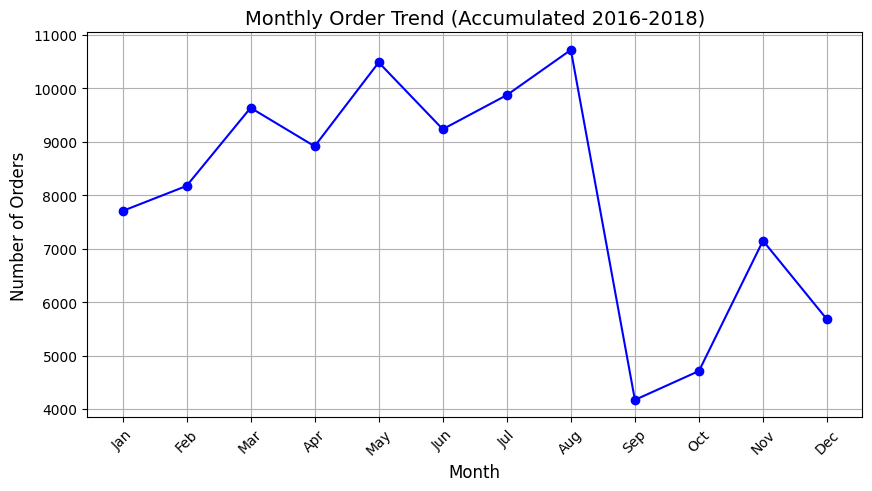

In [185]:
monthly_trend_df = all_df.groupby(all_df["order_approved_at"].dt.month).agg({
    "order_id": "nunique",
    "price": "sum"
}).reset_index()

monthly_trend_df.rename(columns={
    "order_approved_at": "month",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

#Visualisasi Data
plt.figure(figsize=(10, 5))
plt.plot(month_labels, monthly_trend_df["order_count"],
         marker='o', linestyle='-', color="blue")
plt.title("Monthly Order Trend (Accumulated 2016-2018)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Tren Pendapatan Bulanan Akumulasi 3 Tahun

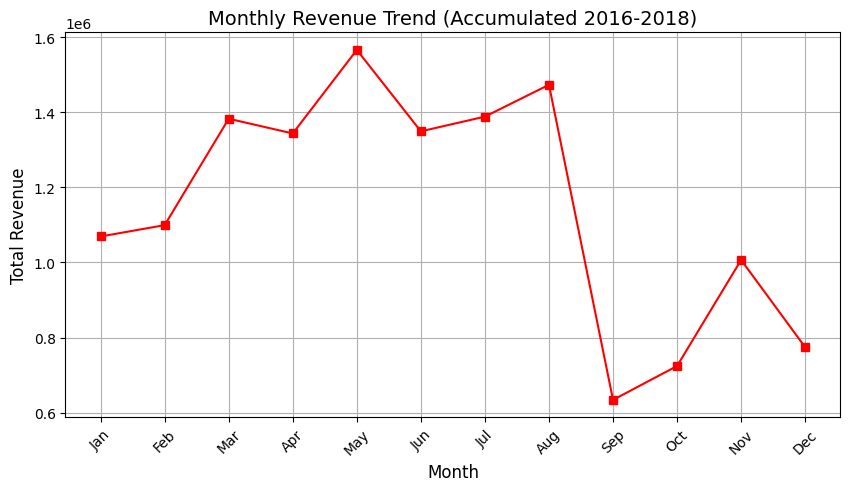

In [186]:
#Visualisasi Data Revenue
plt.figure(figsize=(10, 5))
plt.plot(month_labels, monthly_trend_df["revenue"],
         marker='s', linestyle='-', color="red")
plt.title("Monthly Revenue Trend (Accumulated 2016-2018)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight:**
- Pada visualisasi tren penjualan (total order) selama 3 tahun beroperasi, E-commerce ini terus meningkat secara signifikan tiap tahunnya, dari tahun 2016 yang hanya sedikit pesanan sekitar 270 pesanan (mungkin karena data pesanan hanya ada di akhir tahun), lalu naik signifikan kurang lebih 160 kali lipat pada tahun 2017 menjadi 43 ribuan pesanan, dan tetap naik menjadi 53 ribuan pesanan atau sekitar 120% dari tahun 2017 ke tahun 2018.
- Hal ini berbanding lurus dengan tren pendapatan dalam 3 tahun ini, tren pendapatan juga meningkat tiap tahunnya. Dari tahun 2016 yang hanya mendapat kurang lebih 29 ribu dollar naik 140 kali lipat menjadi 4,2 juta dollar di tahun 2017. Pendapatan tetap naik di tahun berikutnya yaitu 2018 menjadi 5,1 juta dolar atau sebesar 120% dari tahun sebelumnya.
- Pada visualisasi tren penjualan bulanan akumulasi 3 tahun, dapat diketahui bahwa jumlah penjualan cenderung naik turun atau kurang stabil, dimana dari januari hingga agustus penjualan cenderung naik walaupun masih naik turun, dan mengalami penurunan signifikan di bulan september, lalu cenderung naik lagi hingga desember. Namun, dapat juga dilihat bahwa pada akhir tahun jumlah penjualan terlihat lebih sedikit dibandingkan dengan awal-pertengahan tahun. Penjualan tertinggi terjadi di bulan agustus, dan terendah di bulan september. Tentu ini menimbulkan pertanyaan lebih lanjut di selang waktu satu bulan, kok bisa menurut sedrastis itu.
- Hal ini cenderung sejalan atau berbanding lurus dengan tren pendapatan bulanan akumulasi 3 tahun, dari awal hingga pertengahan tahun yaitu bulan agustus cenderung meningkat dan menurun di angka yang stabil, dan juga mengalami penurunan drastis (anjlok) di bulan september. Berbeda dengan jumlah penjualan bulanan yang memiliki peak (puncak) di bulan Agustus, puncak pendapatan tertinggi ada di bulan Mei.
Sedangkan jumlah pendapatan terendah sama seperti jumlah penjualan yaitu pada bulan September. Pendapatan juga memiliki nilai yang cenderung rendah di akhir tahun dibandingkan dengan awal tahun.

### Pertanyaan 2: Bagaimana segmentasi pelanggan yang ada di perusahaan E-Commerce ini?

Segmentasi Pelanggan berdasarkan State

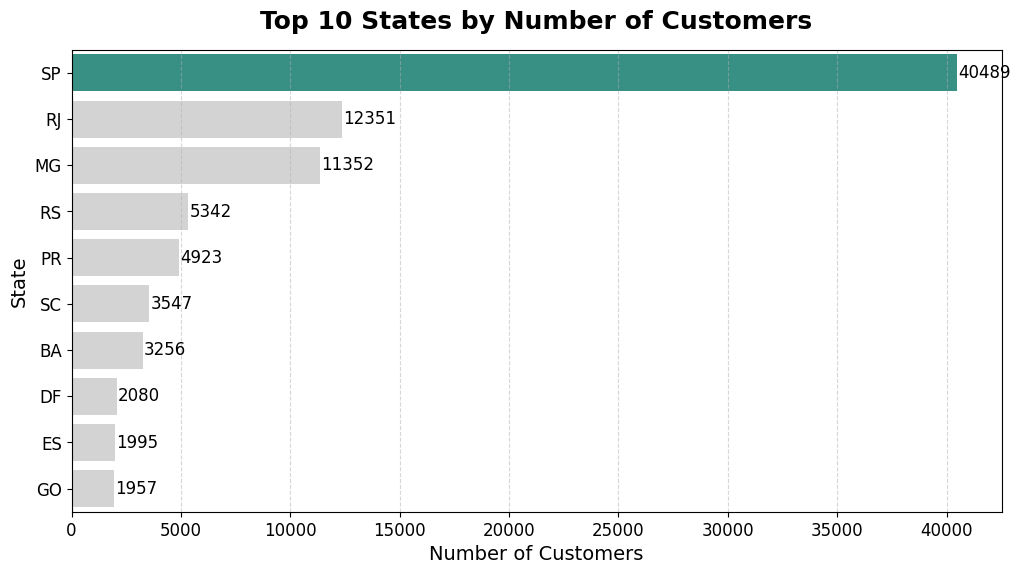

In [187]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)

bystate_df = bystate_df.sort_values(by="customer_count", ascending=False).head(10)

highlight_color = "#2A9D8F"
default_color = "#D3D3D3"
colors = [highlight_color] + [default_color] * (len(bystate_df) - 1)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(
    x="customer_count",
    y="customer_state",
    hue="customer_state",
    data=bystate_df,
    palette=colors,
    legend=False
)

for index, value in enumerate(bystate_df["customer_count"]):
    plt.text(value + 50, index, str(value), va="center", fontsize=12, color="black")

plt.title("Top 10 States by Number of Customers", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Number of Customers", fontsize=14)
plt.ylabel("State", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

Segmentasi Pelanggan berdasarkan Kota (City)

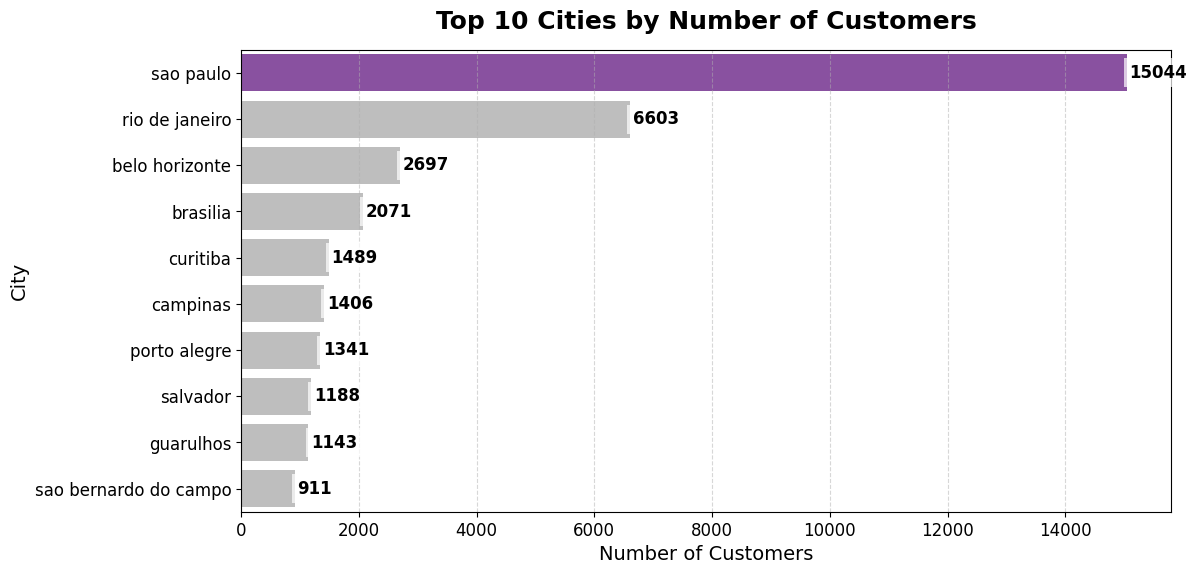

In [188]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={"customer_id": "customer_count"}, inplace=True)

bycity_df = bycity_df.sort_values(by="customer_count", ascending=False).head(10)


highlight_color = "#8E44AD"
default_color = "#BEBEBE"
colors = [highlight_color] + [default_color] * (len(bycity_df) - 1)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(
    x="customer_count",
    y="customer_city",
    hue="customer_city",
    data=bycity_df,
    palette=colors,
    legend=False
)

for index, value in enumerate(bycity_df["customer_count"]):
    plt.text(value + 50, index, str(value),
             va="center", fontsize=12, color="black", fontweight="bold",
             bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

plt.title("Top 10 Cities by Number of Customers", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Number of Customers", fontsize=14)
plt.ylabel("City", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

Segmentasi Pelanggan berdasarkan Metode Pembayaran

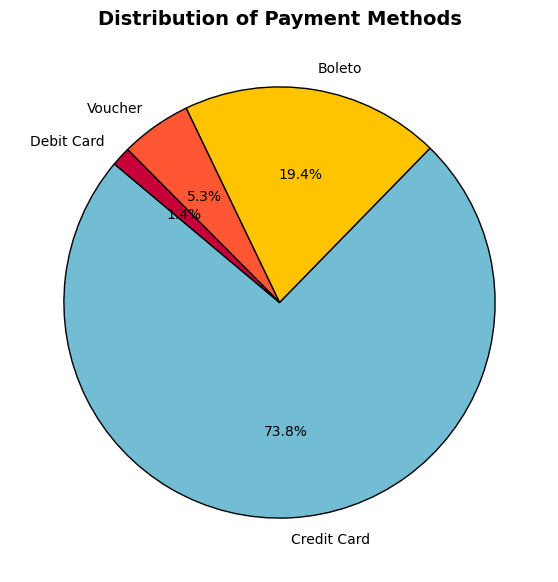

In [189]:
payment_counts_percentage = all_df["payment_type"].value_counts(normalize=True) * 100
labels = [label.replace("_", " ").title() for label in payment_counts_percentage.index]

colors = ["#72BCD4", "#FFC300", "#FF5733", "#C70039"]

#Visualisasi
plt.figure(figsize=(7, 7))
plt.pie(payment_counts_percentage, labels=labels, autopct='%1.1f%%',
        colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Payment Methods", fontsize=14, fontweight="bold")
plt.show()

**Insight:**
- Segmentasi pelanggan berdasarkan state, didominasi oleh state SP yang mencapai 40 ribu lebih total penjualan (order). Lalu disusul oleh state RJ dengan 12 ribu dan state MG dengan 11 ribuan penjualan. Dengan data ini, perusahaan dapat memfokuskan pengembangan strategi pemasaran, peningkatan layanan, serta optimalisasi logistik di state SP, yang memiliki kontribusi terbesar terhadap total penjualan.
- Sementara pada visualisasi segmentasi pelanggan berdasarkan city(kota), kota terbanyak penjualannya adalah Sao Paulo dengan 15 ribu penjualan, lalu disusul oleh Rio de Janiero 6 ribuan penjualan dan Kota Belo Horizonte dengan 2,6 ribu penjualan. Saya rasa bahwa kota Sao Paulo ini berada di state SP, karena sama sama memiliki penjualan tertinggi.
- Grafik segmentasi pelanggan berdasarkan metode pembayaran didominasi oleh Credit Card dengan 73.9% disusul oleh Boleto dengan 19.3%, lalu Voucher dengan 5.4% dan terakhir yaitu Debit Card dengan hanya 1.4%. Berdasarkan data ini, kita bisa mengetahui bahwa pelanggan E-Commerce ini sebagian besar menggunakan credit card sebagai metode pembayarannya, sehingga kita bisa menerapkan strategi perkembangan pada segmen ini, seperti menggandeng partner kartu kredit terpercaya dan banyak diminati atau dengan menawarkan promo pada pengguna dengan tipe pembayaran credit card ini agar lebih mendapatkan pengalaman pengguna yang lebih baik.

### Pertanyaan 3: Apa saja kategori produk yang paling diminati serta kategori produk yang jarang diminati pada E-Commerce ini?

Kategori Produk Paling Laris dan Kategori Produk Paling Jarang diminati

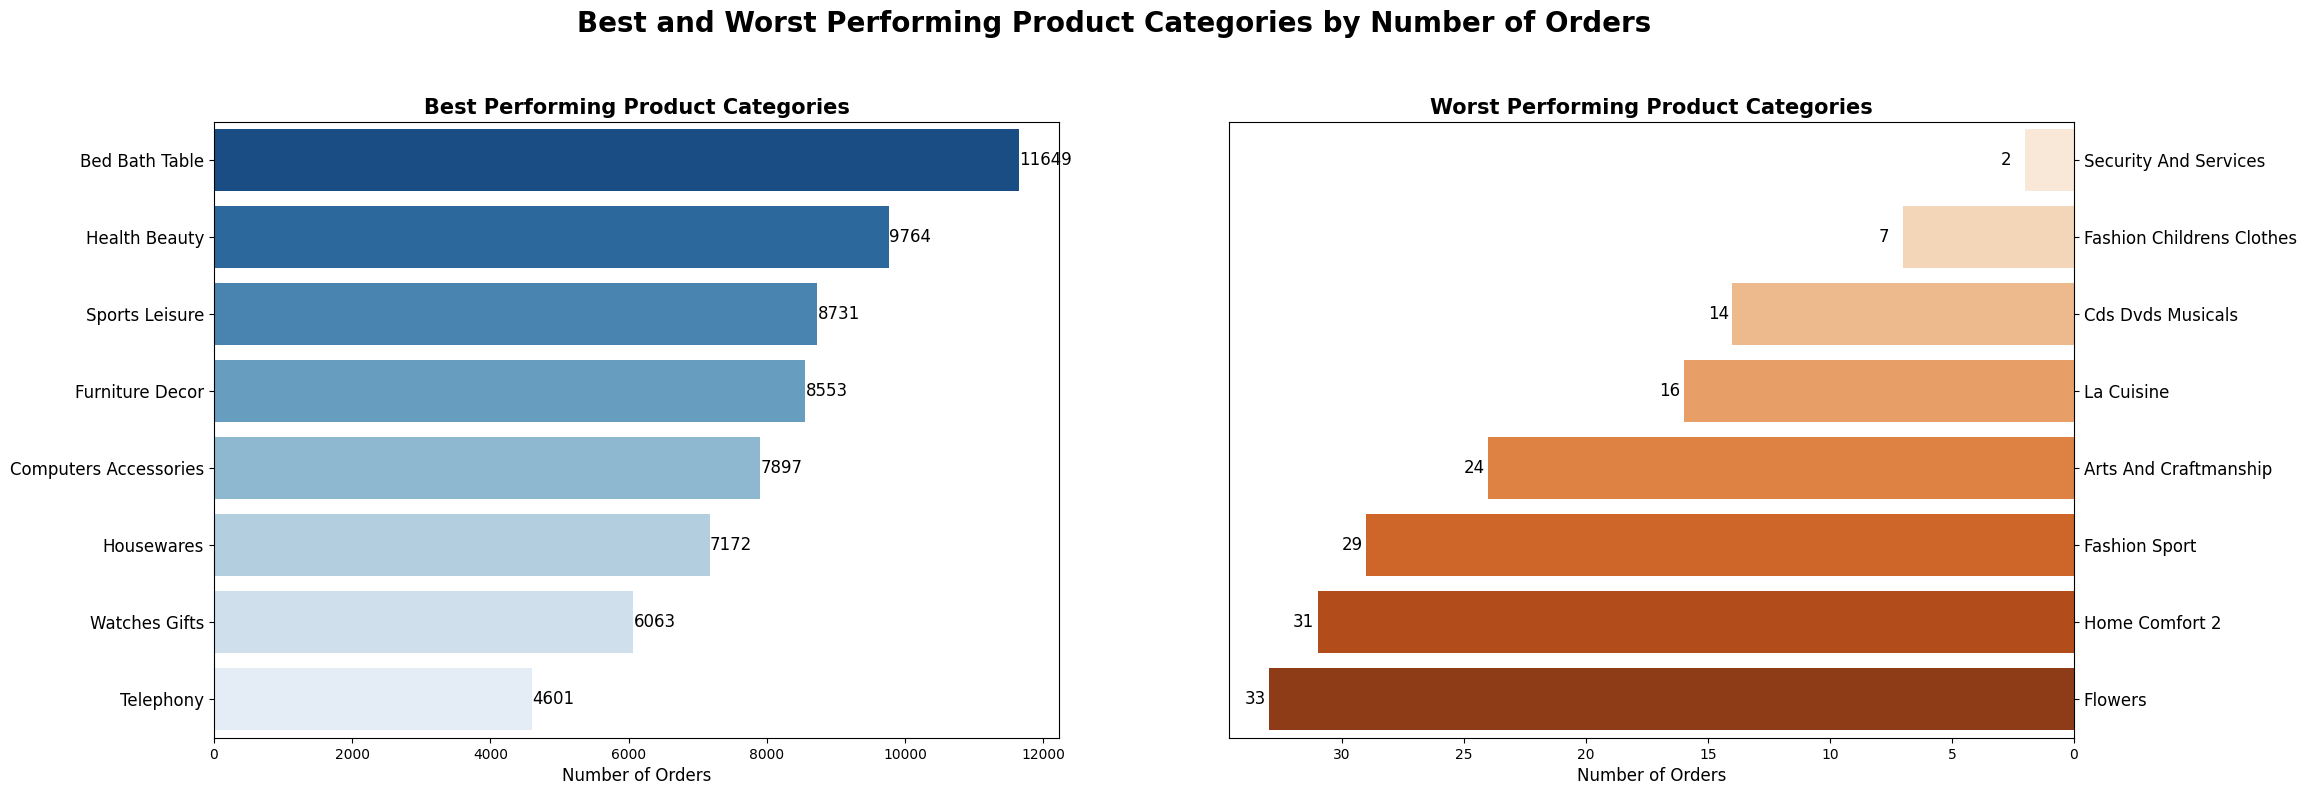

In [190]:
category_counts = all_df["product_category_name_english"].value_counts()

top_categories = category_counts.head(8)
bottom_categories = category_counts.tail(8).sort_values(ascending=True)  # Dibalik agar urutannya dari terkecil

# Mengubah format label kategori agar lebih rapi
top_categories.index = [label.replace("_", " ").title() for label in top_categories.index]
bottom_categories.index = [label.replace("_", " ").title() for label in bottom_categories.index]


top_colors = sns.color_palette("Blues_r", len(top_categories))
bottom_colors = sns.color_palette("Oranges", len(bottom_categories))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Best Performing Categories (Kategori Paling Laris)
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    hue=top_categories.index,
    palette=top_colors,
    legend=False,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Orders", fontsize=12)
ax[0].set_title("Best Performing Product Categories", loc="center", fontsize=15, fontweight="bold")
ax[0].tick_params(axis='y', labelsize=12)

for index, value in enumerate(top_categories.values):
    ax[0].text(value + 5, index, str(value), va="center", fontsize=12, color="black")

# Worst Performing Categories (Kategori Paling Tidak Diminati)
sns.barplot(
    x=bottom_categories.values,
    y=bottom_categories.index,
    hue=bottom_categories.index,
    palette=bottom_colors,
    legend=False,
    ax=ax[1]
)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Orders", fontsize=12)
ax[1].set_title("Worst Performing Product Categories", loc="center", fontsize=15, fontweight="bold")
ax[1].tick_params(axis='y', labelsize=12)

for index, value in enumerate(bottom_categories.values):
    ax[1].text(value + 1, index, str(value), va="center", fontsize=12, color="black", ha="left")

plt.suptitle("Best and Worst Performing Product Categories by Number of Orders", fontsize=20, fontweight="bold", y=1.02)
plt.show()

**Insight:**
- Kategori paling diminati adalah kategori Bed Bath Table dengan 7884 penjualan dan kategori paling jarang diminati adalah Security and Services dengan hanya 1 penjualan.
- Produk-produk dalam kategori kesehatan, kecantikan, dan perlengkapan rumah tangga memiliki permintaan tinggi, sehingga perusahaan bisa fokus pada penambahan stok, penawaran promo, serta optimasi logistik untuk kategori ini. Sedangkan pada kategori yang kurang laku, perusahaan bisa mengevaluasi apa yang salah dan  meminimalisir  atau bahkan meniadakan persediaan kategori produk ini.

## Analisis Lanjutan (RFM Analysis)

**Penjelasan RFM Analysis**

RFM Analysis (Recency, Frequency, Monetary) adalah teknik analisis yang digunakan untuk melakukan segmentasi pelanggan berdasarkan tiga parameter utama, yaitu  

*   Recency   : Kapan terakhir kali pelanggan melakukan transaksi
*   Frequency : Seberapa sering pelanggan bertransaksi
*   Monetary  : Seberapa besar pendapatan yang dihasilkan dari pelanggan tersebut

Dengan menganalisis ketiga aspek ini, perusahaan dapat mengidentifikasi pelanggan dengan nilai valuasi yang tinggi, yaitu mereka yang sering melakukan transaksi, baru saja melakukan pembelian, dan berkontribusi besar terhadap pendapatan.

Teknik ini membantu perusahaan memahami perilaku pelanggan, meningkatkan retensi dengan menawarkan program loyalitas yang lebih tepat sasaran, serta mengoptimalkan strategi pemasaran dan penjualan. Dengan membagi pelanggan ke dalam kategori yang lebih spesifik, seperti pelanggan setia, potensial, atau tidak aktif, bisnis dapat mengambil keputusan yang lebih efektif untuk meningkatkan engagement dan profitabilitas.

In [191]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df["customer_label"] = [f"USER_{i:03}" for i in range(1, len(rfm_df) + 1)]
rfm_df.head()

,customer_id,frequency,monetary,recency,customer_label
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,USER_001
1,000161a058600d5901f007fab4c27140,1,54.90,409,USER_002
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,USER_003
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,USER_004
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,USER_005


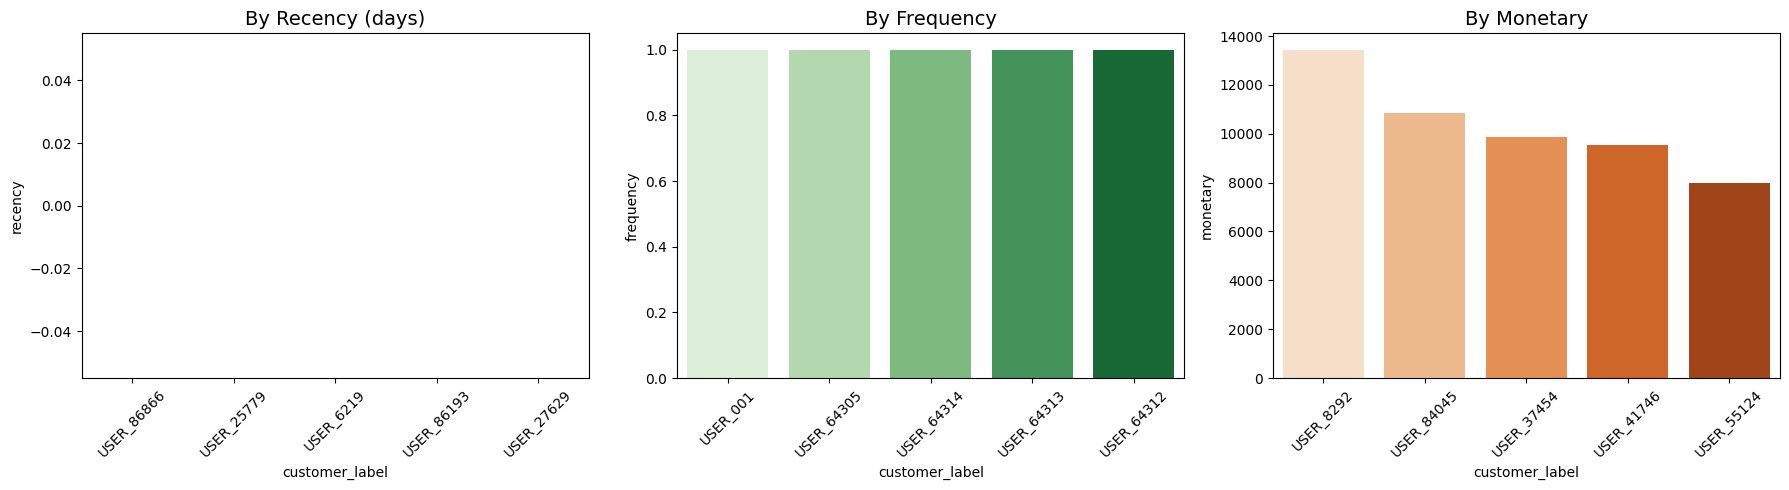

In [192]:
recency_colors = sns.color_palette("Blues_r", 5)
frequency_colors = sns.color_palette("Greens", 5)
monetary_colors = sns.color_palette("Oranges", 5)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot Recency
sns.barplot(y="recency", x="customer_label", hue ="customer_label",
            data=rfm_df.sort_values(by="recency", ascending=True).head(5),
            palette=recency_colors, ax=ax[0])
ax[0].set_title("By Recency (days)", fontsize=14)
ax[0].tick_params(axis='x', rotation=45)

# Plot Frequency
sns.barplot(y="frequency", x="customer_label", hue ="customer_label",
            data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
            palette=frequency_colors, ax=ax[1])
ax[1].set_title("By Frequency", fontsize=14)
ax[1].tick_params(axis='x', rotation=45)

# Plot Monetary
sns.barplot(y="monetary", x="customer_label", hue ="customer_label",
            data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
            palette=monetary_colors, ax=ax[2])
ax[2].set_title("By Monetary", fontsize=14)
ax[2].tick_params(axis='x', rotation=45)

plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)
plt.tight_layout()
plt.show()


**Insight:**
- Grafik berdasarkan *Recency* atau kapan terakhir pelanggan melakukan transaksi terlihat kosong. Setelah ditelusuri lebih lanjut ternyata memang pelanggan tersebut mengunjungi E-Commerce dan melakukan transaksi hanya sekali sehingga nilai Recency mereka menjadi nol. Hal ini menunjukkan bahwa pelanggan belum kembali untuk melakukan transaksi ulang setelah pembelian pertama, sehingga diperlukan strategi retensi seperti penawaran khusus, email pengingat, atau program loyalitas untuk mendorong repeat purchase.
- Dalam visualisasi RFM Analysis by Frequency, terlihat seluruh pelanggan atau lima-lima nya memiliki frekuensi yang sama yaitu 1. Setelah ditelusuri ulang ternyata memang masing-masing pelanggan hanya order atau memesan rata-rata satu kali saja. Hal ini menunjukkan bahwa tingkat retensi pelanggan masih rendah, sehingga diperlukan strategi untuk mendorong pelanggan melakukan repeat order, seperti strategi pemasaran lebih lanjut.
- Pelanggan USER_8292 memiliki total nilai transaksi tertinggi, disusul oleh USER_84045 dan USER_37454.Ini menunjukkan bahwa mereka adalah big spenders, sehingga strategi membership,cashback atau personalisasi penawaran bisa diterapkan untuk meningkatkan loyalitas mereka.

## Conclusion

- Conclution pertanyaan 1

  Berdasarkan analisis tren penjualan dan pendapatan selama tiga tahun, E-Commerce ini menunjukkan pertumbuhan yang sangat pesat dari tahun ke tahun, dengan peningkatan signifikan pada tahun pertama ke tahun kedua. Peningkatan ini mencakup baik dalam jumlah pesanan maupun pendapatan. Namun, meskipun tren tahunan meningkat, terdapat fluktuasi dalam tren bulanan, di mana penjualan dan pendapatan cenderung naik dari awal hingga pertengahan tahun, tetapi mengalami penurunan drastis di bulan September. Puncak penjualan terjadi di bulan Agustus, sementara puncak pendapatan berada di bulan Mei, dengan kecenderungan penurunan di akhir tahun, dan penjualan bersamaan dengan pendapatan mencapai titik terendah di bulan September. Pola ini menunjukkan perlunya strategi untuk menjaga kestabilan penjualan dan pendapatan sepanjang tahun, misalnya dengan kampanye promosi yang lebih kuat di bulan-bulan dengan penurunan tajam serta analisis lebih lanjut terkait faktor penyebab fluktuasi ini.

- Conclution pertanyaan 2

  Segmentasi pelanggan di perusahaan E-Commerce ini menunjukkan bahwa berdasarkan state, penjualan didominasi oleh state SP dengan lebih dari 40 ribu pesanan, diikuti oleh state RJ dan MG dengan masing-masing 12 ribu dan 11 ribuan pesanan. Dari segi kota, Sao Paulo menjadi yang tertinggi dengan 15 ribu pesanan, disusul oleh Rio de Janeiro (6 ribu) dan Belo Horizonte (2,6 ribu), yang kemungkinan besar berada dalam state SP. Sementara itu, dari metode pembayaran, mayoritas pelanggan menggunakan Credit Card (73,9%), diikuti oleh Boleto (19,3%), Voucher (5,4%), dan Debit Card (1,4%). Dengan segmentasi ini, perusahaan dapat fokus pada optimalisasi strategi pemasaran dan logistik di wilayah dengan kontribusi tinggi serta meningkatkan kemitraan atau promo pada metode pembayaran yang paling diminati pelanggan.

- Conclution pertanyaan 3

  Berdasarkan analisis jumlah pesanan, kategori produk yang paling diminati pada E-Commerce ini adalah Bed Bath Table dengan 7.884 pesanan, diikuti oleh kategori Health Beauty, Furniture Decor, dan Sports Leisure, yang juga memiliki angka penjualan tinggi. Produk dalam kategori ini memiliki permintaan yang stabil dan tinggi, sehingga perusahaan dapat mempertimbangkan strategi seperti penambahan stok, promo khusus, serta optimasi logistik untuk meningkatkan kepuasan pelanggan. Sebaliknya, kategori produk yang jarang diminati adalah Security and Services, yang hanya memiliki 1 pesanan, serta Fashion Children's Clothes, La Cuisine, dan Cds Dvds Musicals, yang juga memiliki jumlah pesanan sangat rendah. Untuk kategori dengan permintaan rendah ini, perusahaan perlu mengevaluasi apakah produk tersebut masih relevan, apakah ada masalah dalam pemasaran, atau apakah sebaiknya persediaan produk dikurangi atau dihilangkan untuk efisiensi bisnis.

- Conclution RFM Analysis

  Berdasarkan hasil RFM Analysis, dapat disimpulkan bahwa mayoritas pelanggan hanya melakukan transaksi satu kali (Recency = 0 dan Frequency = 1), menunjukkan rendahnya tingkat retensi pelanggan. Hal ini mengindikasikan perlunya strategi retensi seperti program loyalitas, email pengingat, atau penawaran khusus untuk mendorong pembelian ulang. Dari sisi Monetary, terdapat beberapa pelanggan dengan nilai transaksi tinggi (big spenders), seperti USER_8292, USER_84045, dan USER_37454. Untuk meningkatkan loyalitas mereka, perusahaan dapat menerapkan strategi seperti program membership, cashback, atau penawaran yang dipersonalisasi. Secara keseluruhan, perusahaan perlu lebih fokus pada strategi peningkatan retensi dan frekuensi pembelian guna meningkatkan nilai pelanggan jangka panjang.